In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split

%matplotlib inline



c:\program files (x86)\python3.6.4\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
columns = ['user','activity','timestamp', 'x-axis', 'y-axis', 'z-axis']
df = pd.read_csv('dataset/WISDM_ar_v1.1_raw.txt', header = None, names = columns)
df.tail()

,user,activity,timestamp,x-axis,y-axis,z-axis
1098199,19,Sitting,131623331483000,9.00,-1.57,1.69;
1098200,19,Sitting,131623371431000,9.04,-1.46,1.73;
1098201,19,Sitting,131623411592000,9.08,-1.38,1.69;
1098202,19,Sitting,131623491487000,9.00,-1.46,1.73;
1098203,19,Sitting,131623531465000,8.88,-1.33,1.61;


In [4]:
df.head()

,user,activity,timestamp,x-axis,y-axis,z-axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.50395286;
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433;
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209;
3,33,Jogging,49106222305000,-0.612916,18.496431,3.0237172;
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164;


In [5]:
df["z-axis"] = df["z-axis"].str.replace(';', '').astype(float)

In [6]:
df.head()

,user,activity,timestamp,x-axis,y-axis,z-axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


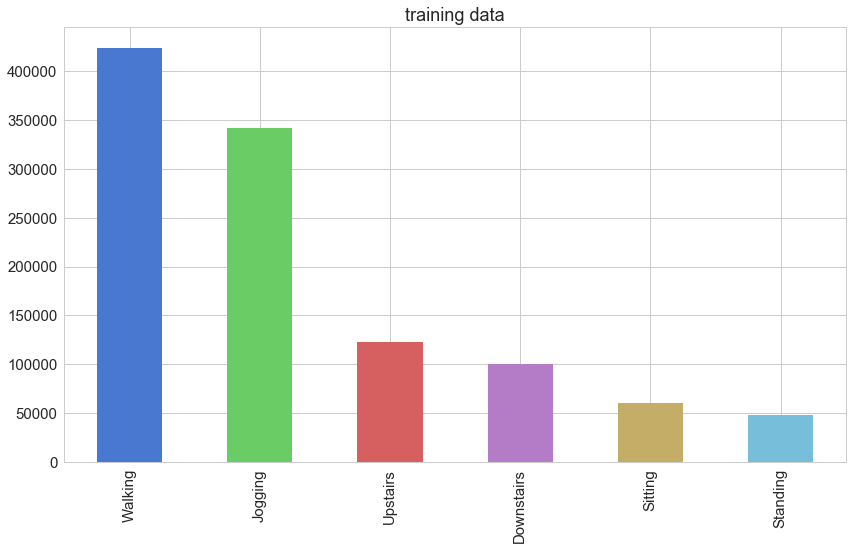

In [7]:
sns.set(palette='muted', font_scale=1.5)
sns.set_style("whitegrid")

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42
df['activity'].value_counts().plot(kind="bar", title='training data')

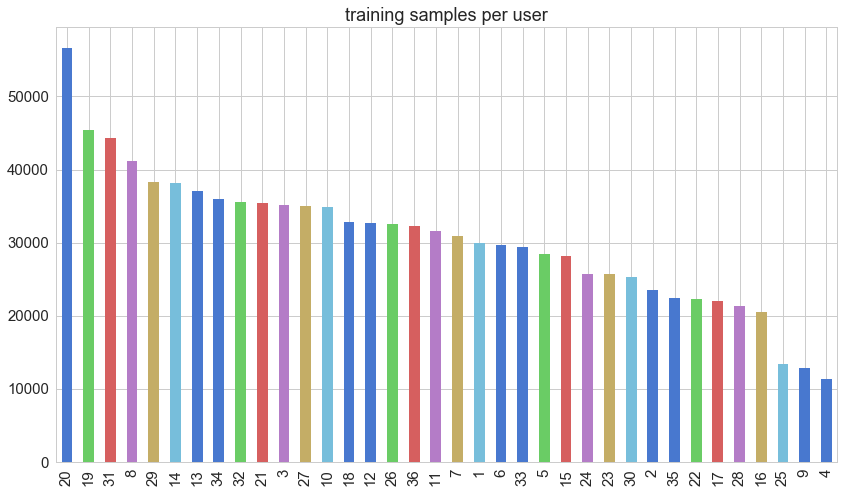

In [8]:
df['user'].value_counts().plot(kind="bar",  title='training samples per user')

In [9]:
def plot_activity(activity, df):
    data = df[df['activity'] == activity][['x-axis', 'y-axis', 'z-axis']][0:500]
    axis = data.plot(subplots=True, figsize=(16, 12), 
                     title=activity)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))
    
    

In [10]:
df.head()


,user,activity,timestamp,x-axis,y-axis,z-axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164


In [11]:
activitiesList = df.activity.unique()
activitiesList


array(['Jogging', 'Walking', 'Upstairs', 'Downstairs', 'Sitting',
       'Standing'], dtype=object)

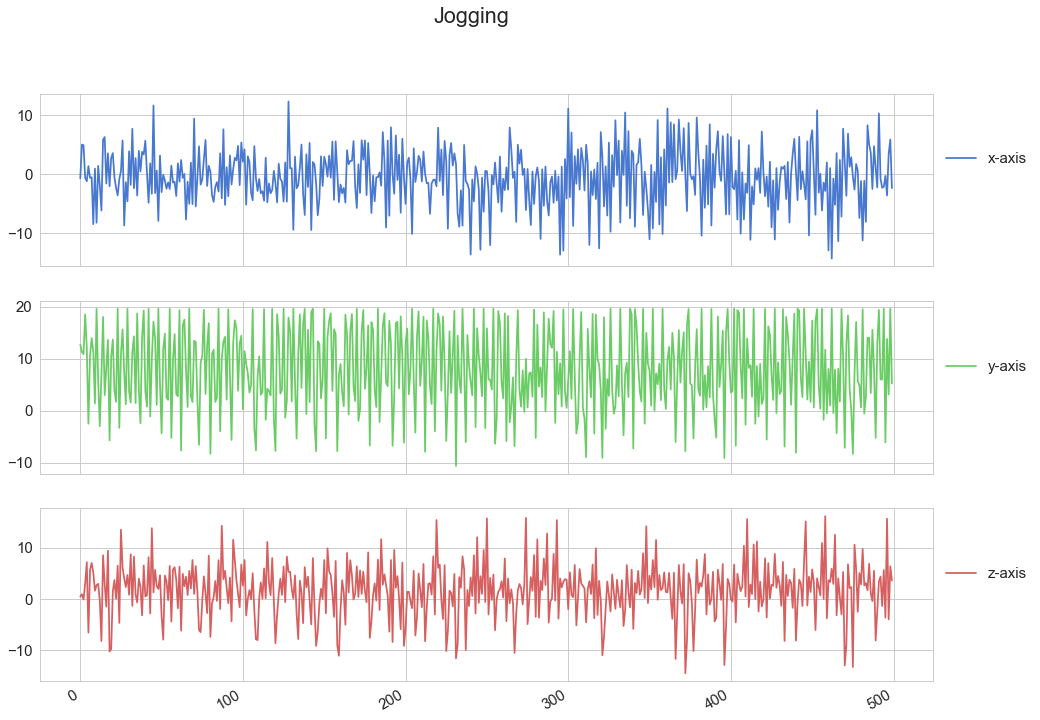

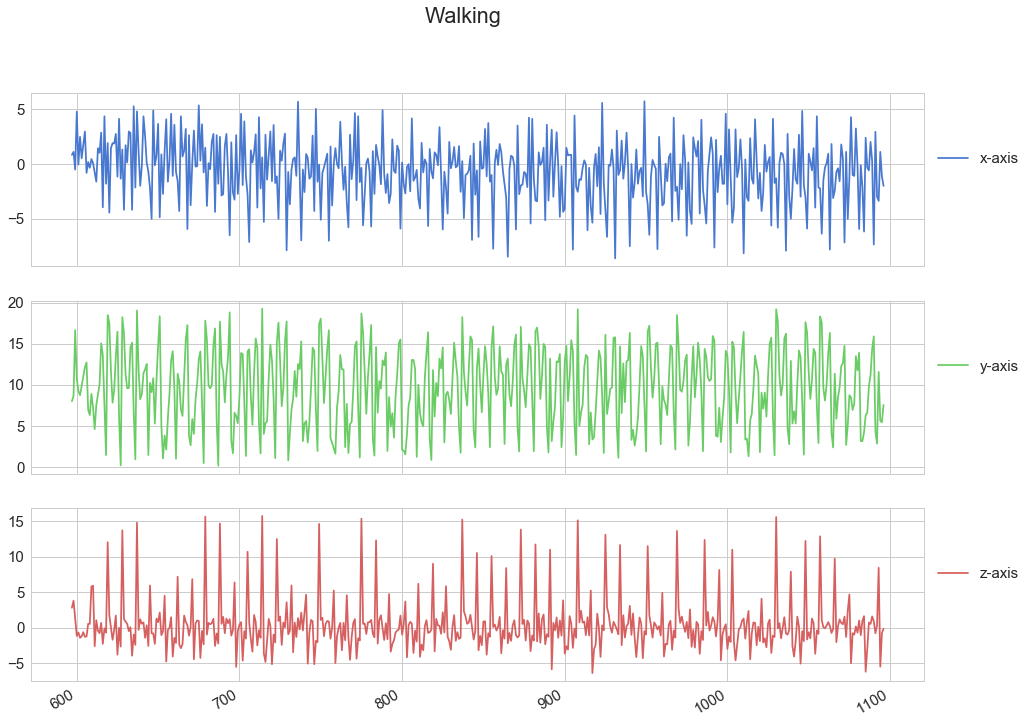

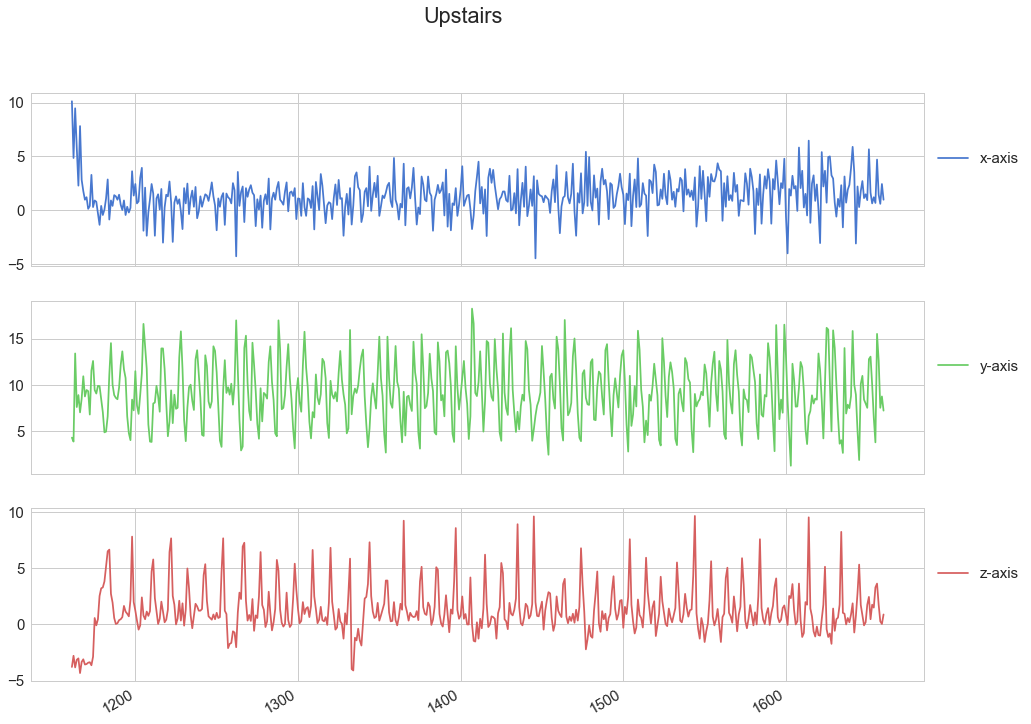

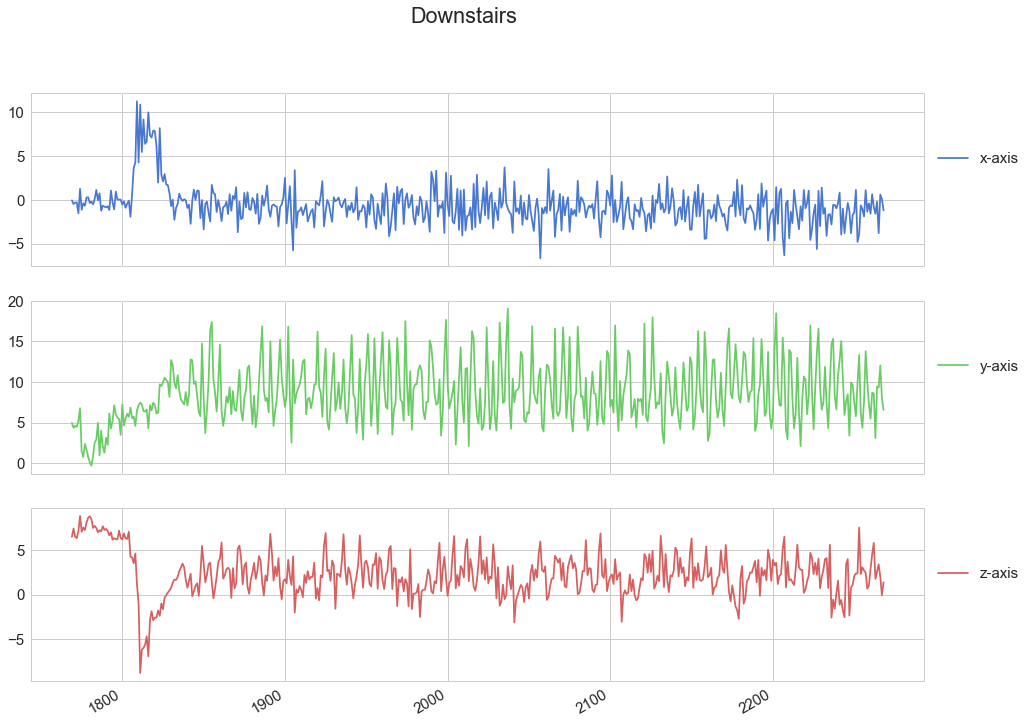

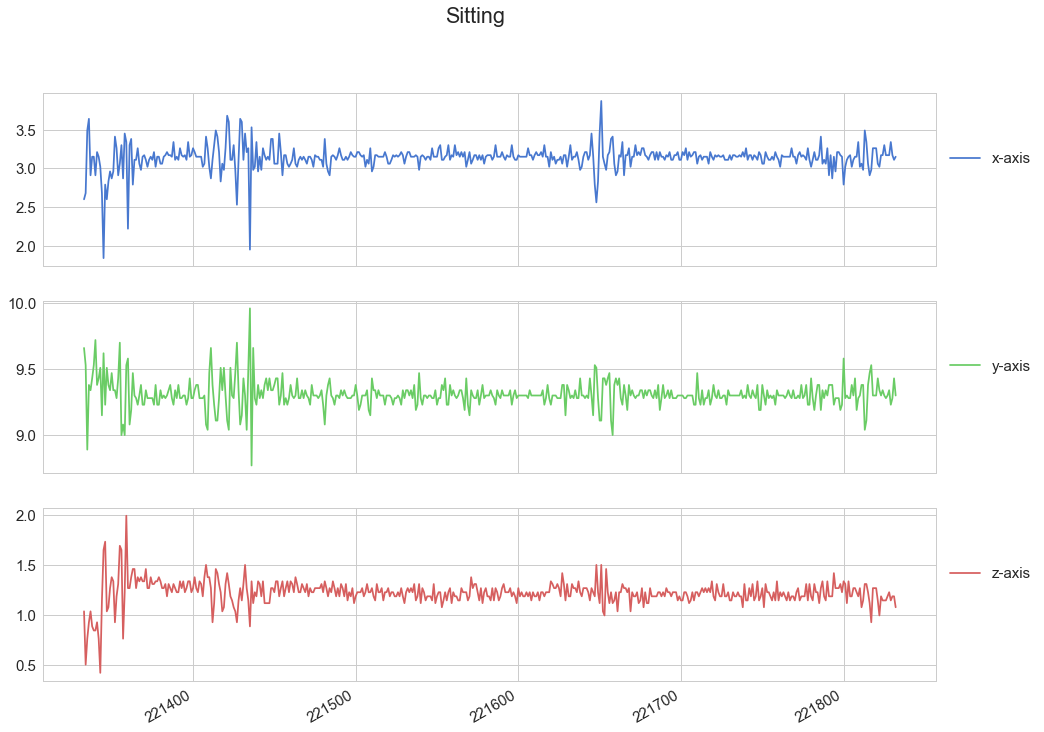

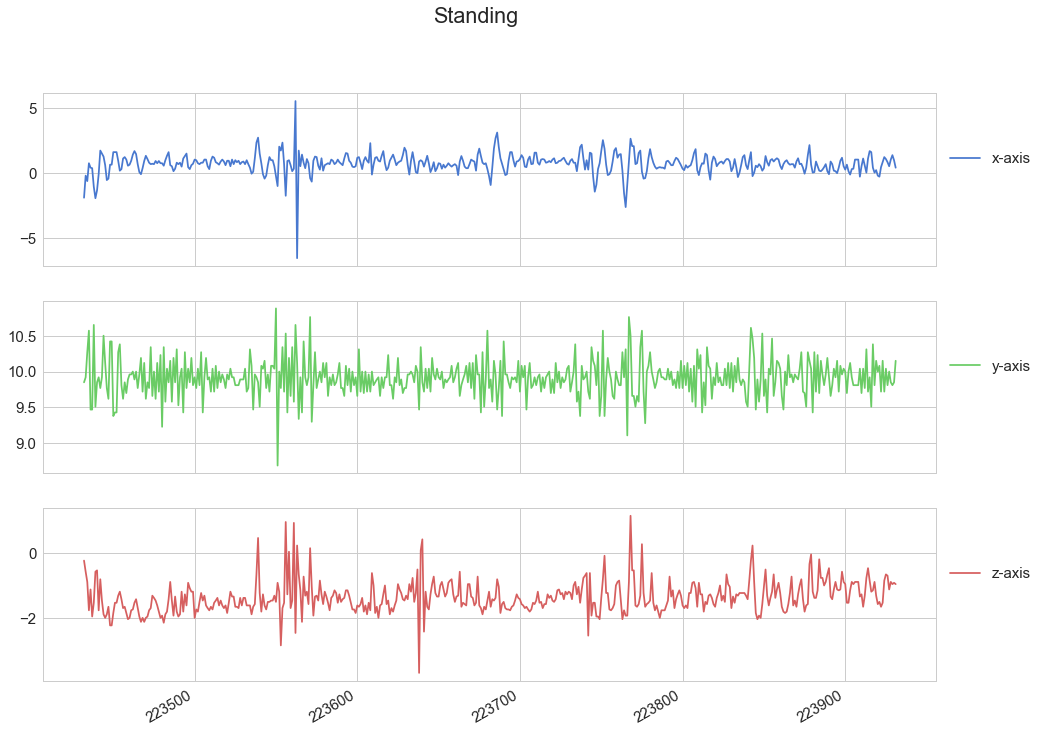

In [13]:
for activity in activitiesList:
    plot_activity(activity, df)

In [14]:
df_test = df.head(3)
df_test

,user,activity,timestamp,x-axis,y-axis,z-axis
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722


In [15]:
df['summary'] = np.sqrt(np.sum([np.square(df["x-axis"]),np.square(df["y-axis"]),np.square(df["z-axis"])], axis=0))
#df['x-axis'] + df['y-axis'] + df['z-axis']

df




,user,activity,timestamp,x-axis,y-axis,z-axis,summary
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953,12.709551
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424,12.365693
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722,11.936562
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717,18.751973
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164,14.139804
5,33,Jogging,49106442306000,1.375655,-2.492524,-6.510526,7.105776
6,33,Jogging,49106542312000,-0.612916,10.569390,5.706926,12.027330
7,33,Jogging,49106652389000,-0.503953,13.947236,7.055340,15.638324
8,33,Jogging,49106762313000,-8.430995,11.413852,5.134871,15.090547
9,33,Jogging,49106872299000,0.953424,1.375655,1.648062,2.348947


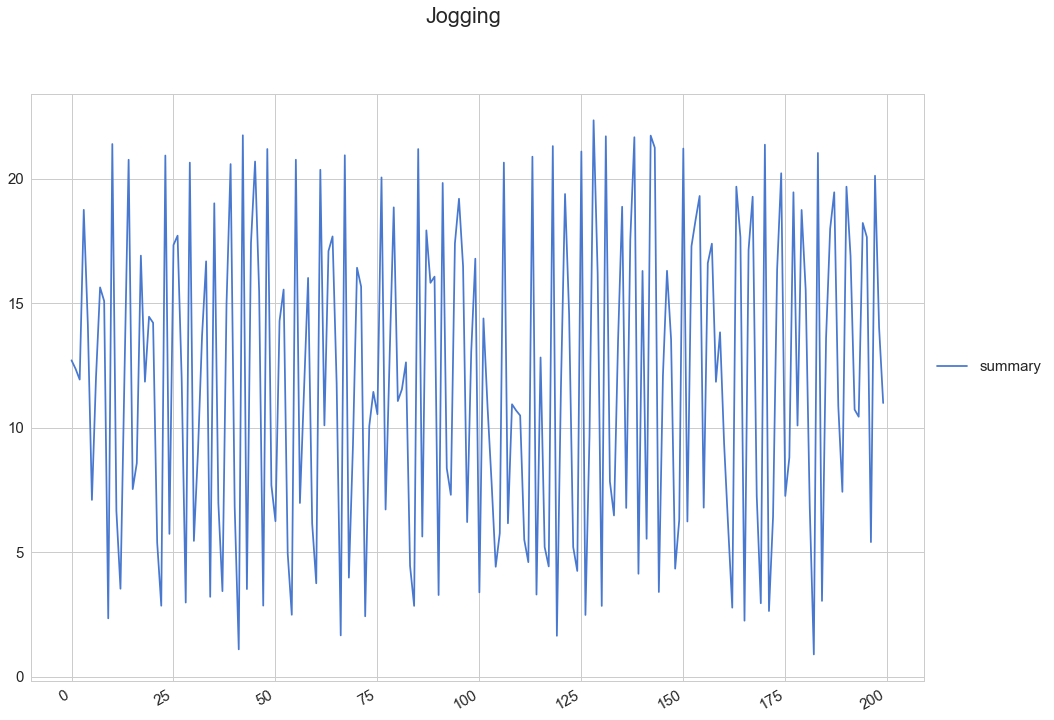

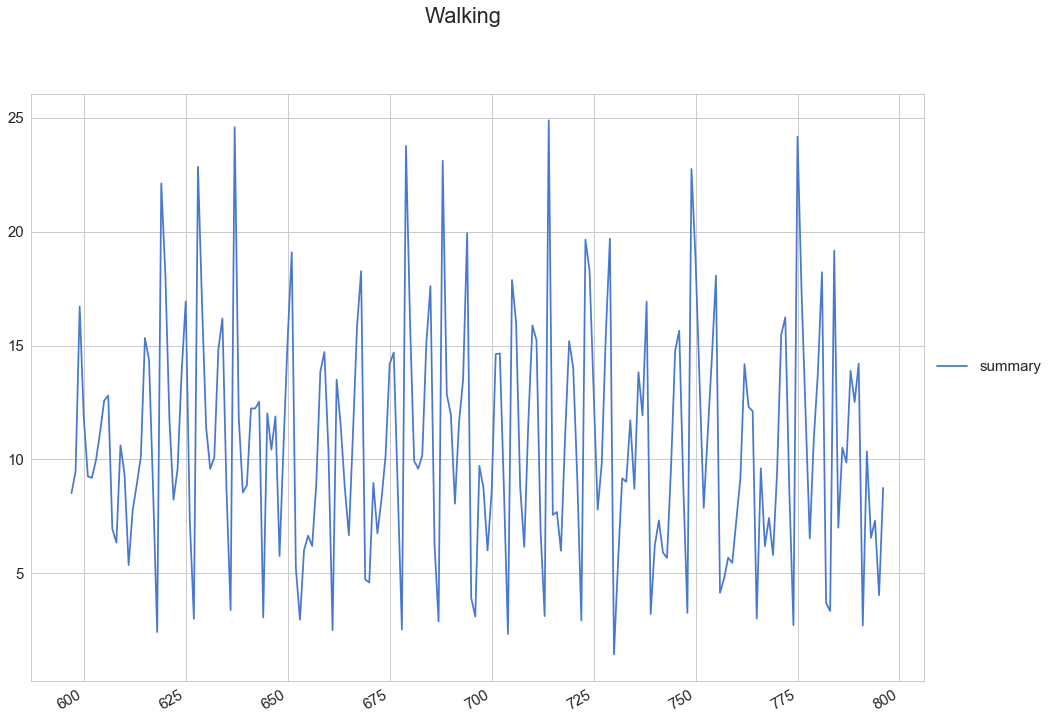

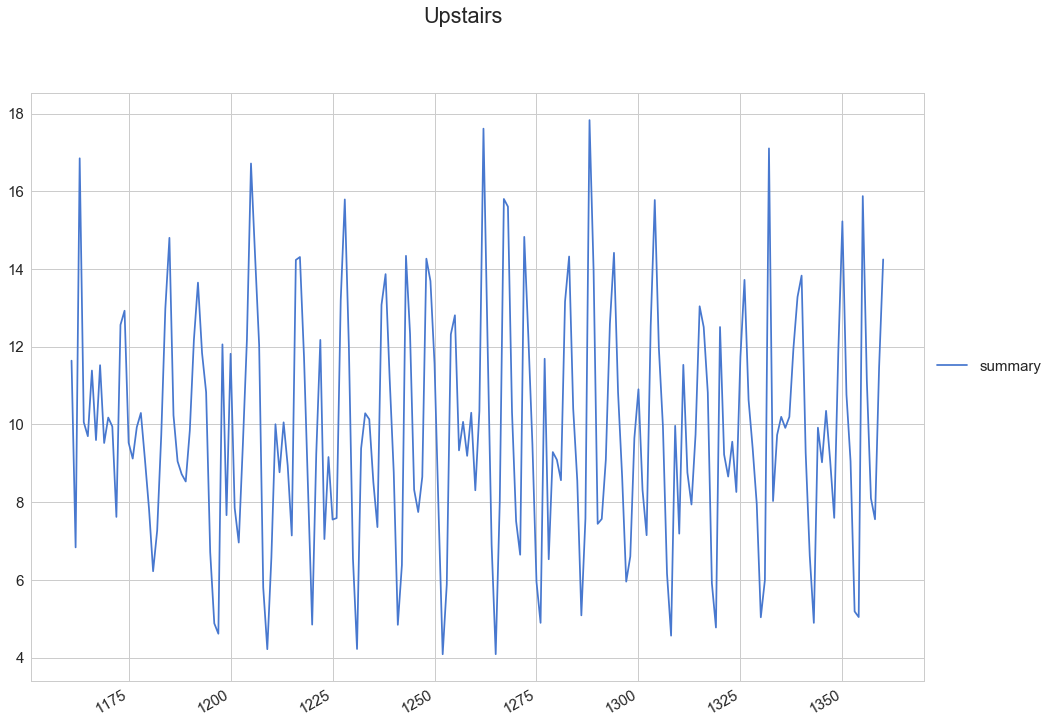

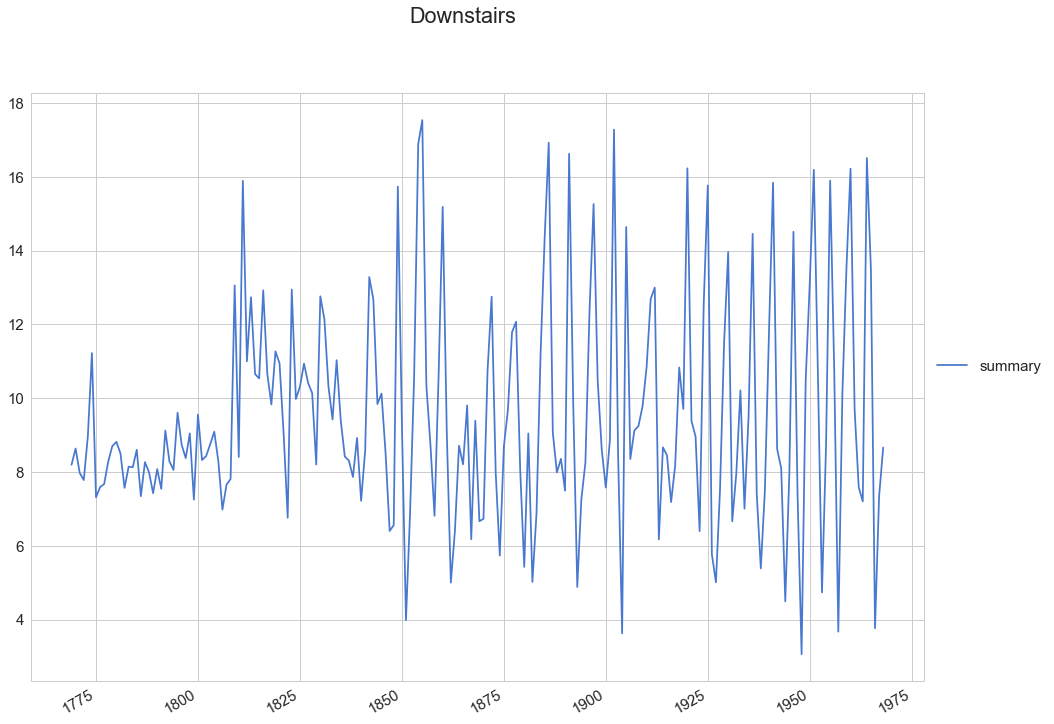

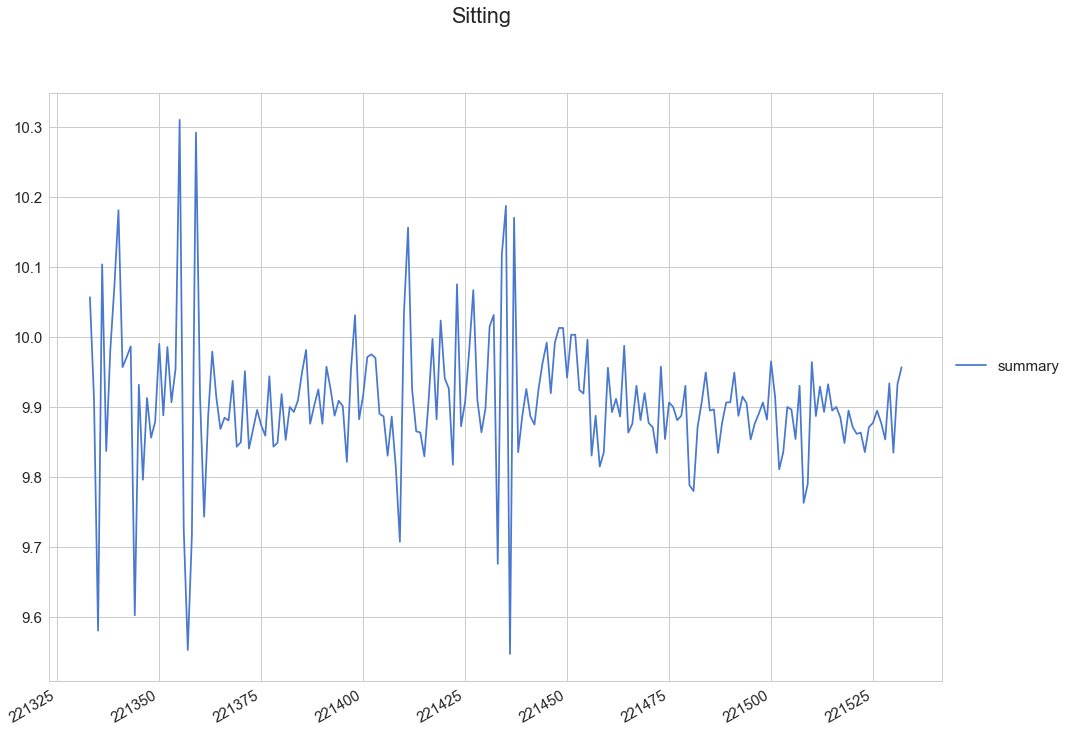

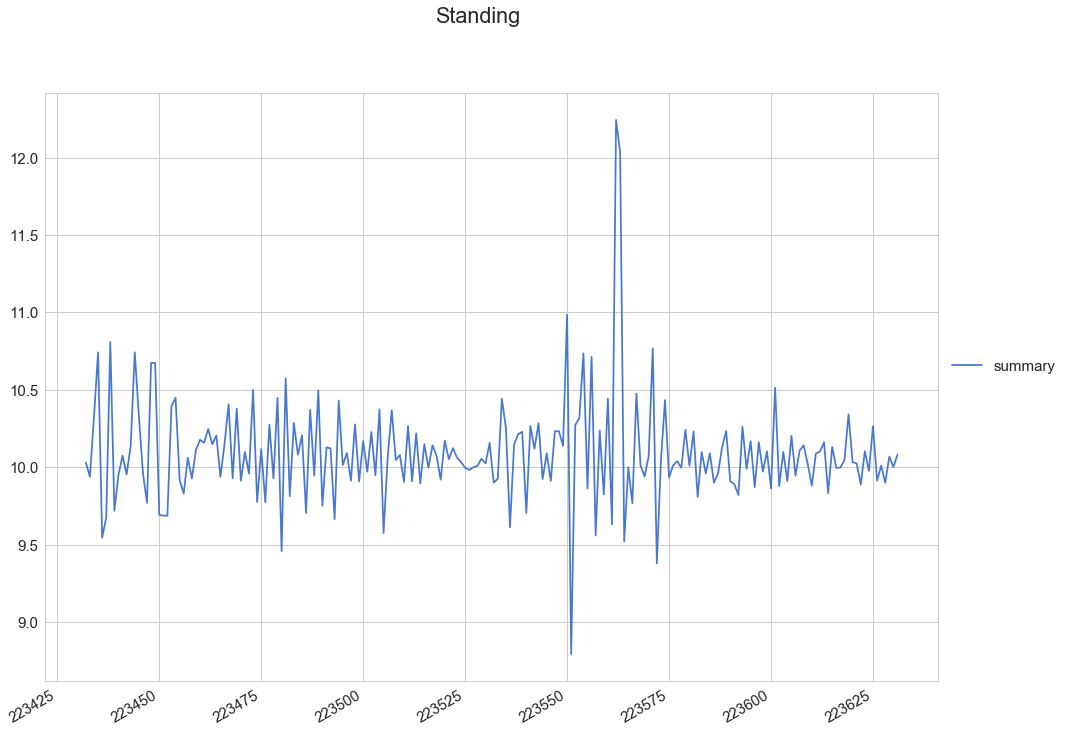

In [24]:
def plot_summary_bar(activity, df):
    data = df[df['activity'] == activity][['summary']][0:200]
    
    axis = data.plot(subplots=True, figsize=(16, 12), 
                     title=activity)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))
        
for activity in activitiesList:
    plot_summary_bar(activity, df)

In [18]:
df.groupby(['activity']).describe()

summary                                                      \
               count       mean       std       min       25%        50%   
activity                                                                   
Downstairs  100427.0  10.831728  4.436855  0.000000  7.792129  10.175171   
Jogging     342176.0  13.410597  7.221159  0.000000  7.486452  13.163408   
Sitting      59939.0   9.847453  0.391693  1.344507  9.579478   9.957038   
Standing     48395.0   9.814641  0.359618  0.000000  9.643182   9.887755   
Upstairs    122869.0  10.696918  4.297636  0.000000  8.097568  10.186430   
Walking     424397.0  11.428976  4.707766  0.000000  7.996055  11.027024   

                                 timestamp                ...   y-axis         \
                  75%        max     count          mean  ...      75%    max   
activity                                                  ...                   
Downstairs  13.505832  31.838042  100427.0  3.054520e+13  ...    11.45  20.04   
Jogging     19.554090  33.377976  342176.0  3.288528e+13  ...    13.38  20.04   
Sitting     10.122391  19.596278   59939.0  4.581757e+13  ...     3.72  18.47   
Standing    10.005616  19.847380   48395.0  5.046419e+13  ...     9.81  19.46   
Upstairs    13.036361  32.237012  122869.0  3.447688e+13  ...    11.03  20.04   
Walking     14.399517  31.708895  424398.0  3.050262e+13  ...    12.15  20.04   

              z-axis                                                           \
               count      mean       std    min       25%       50%       75%   
activity                                                                        
Downstairs  100427.0  0.684080  3.706798 -19.61 -1.438689  0.503953  2.750000   
Jogging     342176.0 -0.124317  5.833207 -19.80 -3.490000 -0.299648  3.296124   
Sitting      59939.0  6.559716  3.735591 -10.80  5.710000  8.117727  8.920000   
Standing     48395.0  0.580193  1.376870  -4.14 -0.500000  0.650000  1.420000   
Upstairs    122869.0  0.323542  3.567884 -19.61 -1.688923  0.081722  2.070293   
Walking     424397.0 -0.084231  4.011061 -19.38 -2.370000 -0.503953  1.690000   

                   
              max  
activity           
Downstairs  19.34  
Jogging     19.61  
Sitting     13.99  
Standing     7.25  
Upstairs    19.19  
Walking     19.23  

[6 rows x 48 columns]

In [20]:
df[["activity", "x-axis"]].groupby(['activity']).describe()

x-axis                                                    
               count      mean       std    min   25%   50%   75%    max
activity                                                                
Downstairs  100427.0  0.471718  4.955948 -19.61 -2.18  0.08  2.83  19.95
Jogging     342176.0 -0.201981  9.109505 -19.61 -5.43  0.00  5.18  19.95
Sitting      59939.0  1.856270  4.759028 -10.31 -1.61  1.53  5.75  12.45
Standing     48395.0 -1.178258  3.235125 -10.99 -2.03 -1.12  0.61  13.10
Upstairs    122869.0  0.381334  5.495272 -19.61 -2.26  0.15  3.06  19.95
Walking     424398.0  1.528303  5.793337 -19.61 -2.15  0.95  4.82  19.91

In [21]:
df[["activity", "y-axis"]].groupby(['activity']).describe()

y-axis                                                     
               count      mean       std    min   25%   50%    75%    max
activity                                                                 
Downstairs  100427.0  8.600230  4.904716 -19.61  5.94  8.58  11.45  20.04
Jogging     342176.0  5.461138  9.224966 -19.61 -0.72  4.56  13.38  20.04
Sitting      59939.0  1.853374  3.257750  -9.30 -0.95  2.49   3.72  18.47
Standing     48395.0  8.987236  1.264772  -0.65  8.50  9.43   9.81  19.46
Upstairs    122869.0  8.111545  4.890709 -19.61  5.43  8.54  11.03  20.04
Walking     424398.0  8.702026  5.006498 -18.85  5.28  8.77  12.15  20.04

In [22]:
df[["activity", "z-axis"]].groupby(['activity']).describe()

z-axis                                                           \
               count      mean       std    min       25%       50%       75%   
activity                                                                        
Downstairs  100427.0  0.684080  3.706798 -19.61 -1.438689  0.503953  2.750000   
Jogging     342176.0 -0.124317  5.833207 -19.80 -3.490000 -0.299648  3.296124   
Sitting      59939.0  6.559716  3.735591 -10.80  5.710000  8.117727  8.920000   
Standing     48395.0  0.580193  1.376870  -4.14 -0.500000  0.650000  1.420000   
Upstairs    122869.0  0.323542  3.567884 -19.61 -1.688923  0.081722  2.070293   
Walking     424397.0 -0.084231  4.011061 -19.38 -2.370000 -0.503953  1.690000   

                   
              max  
activity           
Downstairs  19.34  
Jogging     19.61  
Sitting     13.99  
Standing     7.25  
Upstairs    19.19  
Walking     19.23

In [25]:
N_TIME_STEPS = 200
N_FEATURES = 3
step = 20
segments = []
labels = []
for i in range(0, len(df) - N_TIME_STEPS, step):
    xs = df['x-axis'].values[i: i + N_TIME_STEPS]
    ys = df['y-axis'].values[i: i + N_TIME_STEPS]
    zs = df['z-axis'].values[i: i + N_TIME_STEPS]
    label = stats.mode(df['activity'][i: i + N_TIME_STEPS])[0][0]
    segments.append([xs, ys, zs])
    labels.append(label)

c:\program files (x86)\python3.6.4\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


In [26]:
np.array(segments).shape

(54901, 3, 200)

In [27]:
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)

In [28]:
reshaped_segments.shape

(54901, 200, 3)

In [29]:
labels[0]

array([0., 1., 0., 0., 0., 0.], dtype=float32)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
        reshaped_segments, labels, test_size=0.2, random_state=RANDOM_SEED)

In [31]:
len(X_train)

43920

In [32]:
len(X_test)

10981

In [33]:
N_CLASSES = 6
N_HIDDEN_UNITS = 64

In [34]:
def create_LSTM_model(inputs):
    W = {
        'hidden': tf.Variable(tf.random_normal([N_FEATURES, N_HIDDEN_UNITS])),
        'output': tf.Variable(tf.random_normal([N_HIDDEN_UNITS, N_CLASSES]))
    }
    biases = {
        'hidden': tf.Variable(tf.random_normal([N_HIDDEN_UNITS], mean=1.0)),
        'output': tf.Variable(tf.random_normal([N_CLASSES]))
    }
    
    X = tf.transpose(inputs, [1, 0, 2])
    X = tf.reshape(X, [-1, N_FEATURES])
    hidden = tf.nn.relu(tf.matmul(X, W['hidden']) + biases['hidden'])
    hidden = tf.split(hidden, N_TIME_STEPS, 0)

    # Stack 2 LSTM layers
    lstm_layers = [tf.contrib.rnn.BasicLSTMCell(N_HIDDEN_UNITS, forget_bias=1.0) for _ in range(2)]
    lstm_layers = tf.contrib.rnn.MultiRNNCell(lstm_layers)

    outputs, _ = tf.contrib.rnn.static_rnn(lstm_layers, hidden, dtype=tf.float32)

    # Get output for the last time step
    lstm_last_output = outputs[-1]

    return tf.matmul(lstm_last_output, W['output']) + biases['output']

In [35]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, N_TIME_STEPS, N_FEATURES], name="input")
Y = tf.placeholder(tf.float32, [None, N_CLASSES])

In [36]:
pred_Y = create_LSTM_model(X)

pred_softmax = tf.nn.softmax(pred_Y, name="y_")

In [37]:
L2_LOSS = 0.0015

l2 = L2_LOSS * \
    sum(tf.nn.l2_loss(tf_var) for tf_var in tf.trainable_variables())

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred_Y, labels = Y)) + l2

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [38]:
LEARNING_RATE = 0.0025

optimizer = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE).minimize(loss)

correct_pred = tf.equal(tf.argmax(pred_softmax, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, dtype=tf.float32))

In [39]:
N_EPOCHS = 50
BATCH_SIZE = 1024

In [40]:
saver = tf.train.Saver()

history = dict(train_loss=[], 
                     train_acc=[], 
                     test_loss=[], 
                     test_acc=[])

sess=tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

train_count = len(X_train)

for i in range(1, N_EPOCHS + 1):
    for start, end in zip(range(0, train_count, BATCH_SIZE),
                          range(BATCH_SIZE, train_count + 1,BATCH_SIZE)):
        sess.run(optimizer, feed_dict={X: X_train[start:end],
                                       Y: y_train[start:end]})

    _, acc_train, loss_train = sess.run([pred_softmax, accuracy, loss], feed_dict={
                                            X: X_train, Y: y_train})

    _, acc_test, loss_test = sess.run([pred_softmax, accuracy, loss], feed_dict={
                                            X: X_test, Y: y_test})

    history['train_loss'].append(loss_train)
    history['train_acc'].append(acc_train)
    history['test_loss'].append(loss_test)
    history['test_acc'].append(acc_test)

    if i != 1 and i % 10 != 0:
        continue

    print(f'epoch: {i} test accuracy: {acc_test} loss: {loss_test}')
    
predictions, acc_final, loss_final = sess.run([pred_softmax, accuracy, loss], feed_dict={X: X_test, Y: y_test})

print()
print(f'final results: accuracy: {acc_final} loss: {loss_final}')


epoch: 1 test accuracy: 0.09634824097156525 loss: nan
epoch: 10 test accuracy: 0.09634824097156525 loss: nan
epoch: 20 test accuracy: 0.09634824097156525 loss: nan
epoch: 30 test accuracy: 0.09634824097156525 loss: nan
epoch: 40 test accuracy: 0.09634824097156525 loss: nan
epoch: 50 test accuracy: 0.09634824097156525 loss: nan

final results: accuracy: 0.09634824097156525 loss: nan


In [42]:
pickle.dump(predictions, open("predictions.p", "wb"))
pickle.dump(history, open("history.p", "wb"))
tf.train.write_graph(sess.graph_def, '.', './checkpoint/har.pbtxt')  
saver.save(sess, save_path = "./checkpoint/har.ckpt")
sess.close()

In [43]:
history = pickle.load(open("history.p", "rb"))
predictions = pickle.load(open("predictions.p", "rb"))

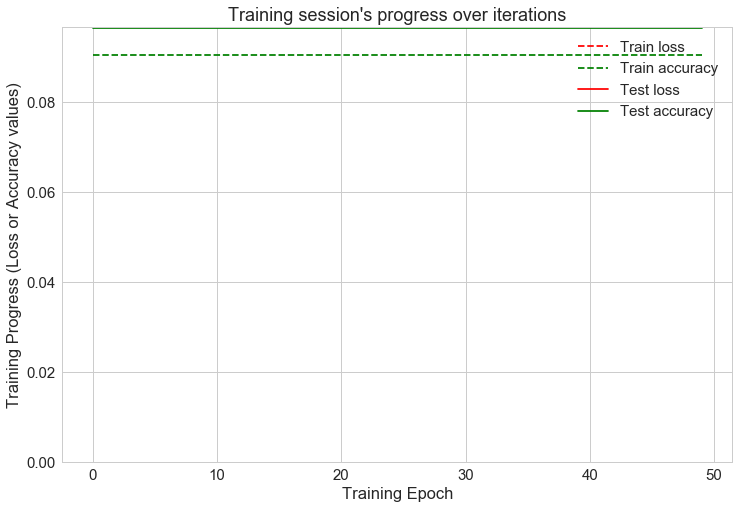

In [44]:
plt.figure(figsize=(12, 8))

plt.plot(np.array(history['train_loss']), "r--", label="Train loss")
plt.plot(np.array(history['train_acc']), "g--", label="Train accuracy")

plt.plot(np.array(history['test_loss']), "r-", label="Test loss")
plt.plot(np.array(history['test_acc']), "g-", label="Test accuracy")

plt.title("Training session's progress over iterations")
plt.legend(loc='upper right', shadow=True)
plt.ylabel('Training Progress (Loss or Accuracy values)')
plt.xlabel('Training Epoch')
plt.ylim(0)

plt.show()


In [45]:
LABELS = ['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs', 'Walking']

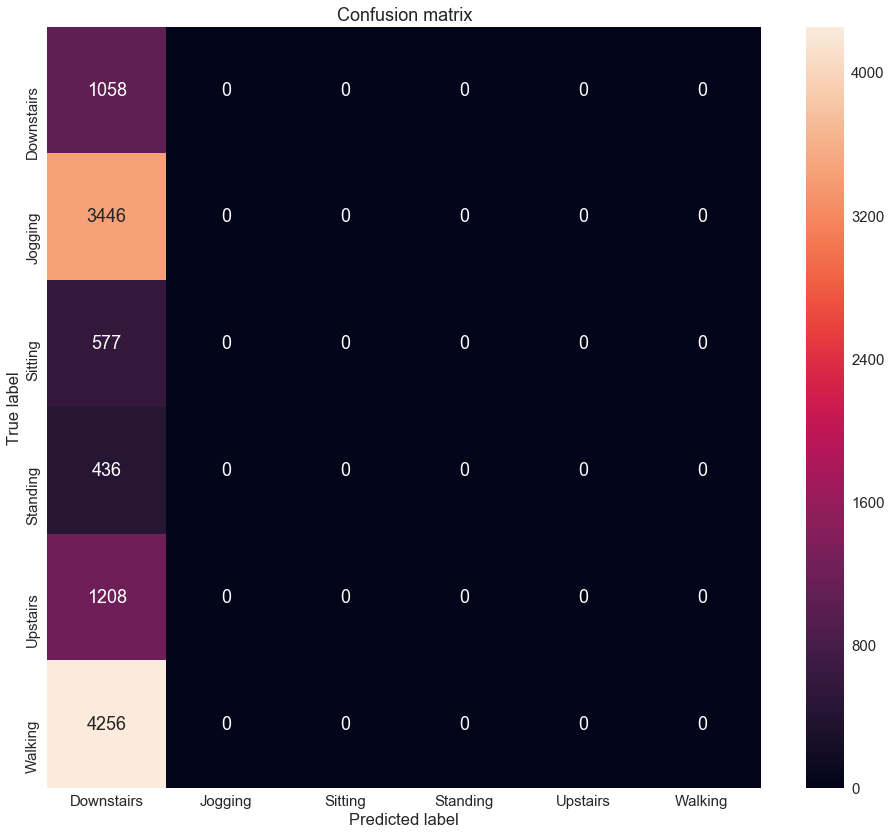

In [46]:
max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)

plt.figure(figsize=(16, 14))
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [47]:
from tensorflow.python.tools import freeze_graph

MODEL_NAME = 'har'

input_graph_path = 'checkpoint/' + MODEL_NAME+'.pbtxt'
checkpoint_path = './checkpoint/' +MODEL_NAME+'.ckpt'
restore_op_name = "save/restore_all"
filename_tensor_name = "save/Const:0"
output_frozen_graph_name = 'frozen_'+MODEL_NAME+'.pb'

freeze_graph.freeze_graph(input_graph_path, input_saver="",
                          input_binary=False, input_checkpoint=checkpoint_path, 
                          output_node_names="y_", restore_op_name="save/restore_all",
                          filename_tensor_name="save/Const:0", 
                          output_graph=output_frozen_graph_name, clear_devices=True, initializer_nodes="")

INFO:tensorflow:Restoring parameters from ./checkpoint/har.ckpt
INFO:tensorflow:Froze 8 variables.
Converted 8 variables to const ops.
